In [78]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
from scipy.stats import multivariate_normal 
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import sys

In [79]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

Problem 1

In [80]:
def ldaLearn(X,y):
    means=[]
    for i in range(1,6):
        L=np.where(y==i)[0]
        means+=[np.mean(X[L],axis=0)]
    means=np.asarray(means)
    
    means
    covmat=np.cov(X.transpose())
    
    return means,covmat

In [81]:
def qdaLearn(X,y):
    means=[]
    covmats=[]
    for i in range(1,6):
        L=np.where(y==i)[0]
        means+=[np.mean(X[L],axis=0)]
    means=np.asarray(means)
    
    
    for i in range(1,6):
        L=np.where(y==i)[0]
        covmats+=[np.cov(X[L].transpose())]
    
    return means,covmats

In [82]:
def ldaTest(means,covmat,Xtest,ytest):
    for i in range(0,5):

        if i == 0:
            a=multivariate_normal.pdf(Xtest,means[i,:],covmat).reshape(Xtest.shape[0],1)
        else:
            b=multivariate_normal.pdf(Xtest,means[i,:],covmat).reshape(Xtest.shape[0],1)
            c=np.hstack((a,b))
            a=c
    ypred=np.argmax(a,axis=1)+1
    compare=ypred.astype(int)==ytest.flatten().astype(int)
    a=compare.tolist().count(True)
    b=len(ytest)
    acc=a/b
    return acc,ypred

In [83]:
def qdaTest(means,covmats,Xtest,ytest):
    
    for i in range(0,5):

        if i == 0:
            
            a=multivariate_normal.pdf(Xtest,means[i,:],covmats[i]).reshape(Xtest.shape[0],1)
        
        else:
            b=multivariate_normal.pdf(Xtest,means[i,:],covmats[i]).reshape(Xtest.shape[0],1)
            c=np.hstack((a,b))
            a=c
    
    ypred=np.argmax(a,axis=1)+1
    compare=ypred.astype(int)==ytest.flatten().astype(int)
    a=compare.tolist().count(True)
    b=len(ytest)
    acc=a/b
    
    return acc,ypred

In [84]:
def learnOLERegression(X,y):
    
    w=np.dot(inv(np.dot(X.transpose(),X)),np.dot(X.transpose(),y))
    
    return w

In [85]:
def learnRidgeRegression(X,y,lambd):
    w=np.dot(inv(np.dot(X.transpose(),X)+np.dot(lambd,np.eye(X.shape[1]))),np.dot(X.transpose(),y))
    return w

In [86]:
def testOLERegression(w,Xtest,ytest):
    mse=np.sum((ytest-np.dot(Xtest,w))**2)/len(Xtest)
    return mse

In [88]:
def regressionObjVal(w, X, y, lambd):
    w=np.asmatrix(w).transpose()
    
    error=0.5*(np.dot((y-np.dot(X,w)).transpose(),y-np.dot(X,w))+lambd*np.dot(w.transpose(),w))
    
    error_grad=-(np.dot(X.transpose(),(y-np.dot(X,w))))+lambd*w
    error_grad=np.squeeze(np.array(error_grad))
    return error, error_grad

In [89]:
def mapNonLinear(x,p):
    Xp=np.zeros((x.shape[0],p+1))
    for i in range(p+1):
        Xp[:,i]=x**i
    return Xp

In [90]:
# LDA
means,covmat = ldaLearn(X,y)
ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
print('LDA Accuracy = '+str(ldaacc))
means,covmats = qdaLearn(X,y)
means,covmats = qdaLearn(X,y)
qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
print('QDA Accuracy = '+str(qdaacc))

LDA Accuracy = 0.97
QDA Accuracy = 0.96


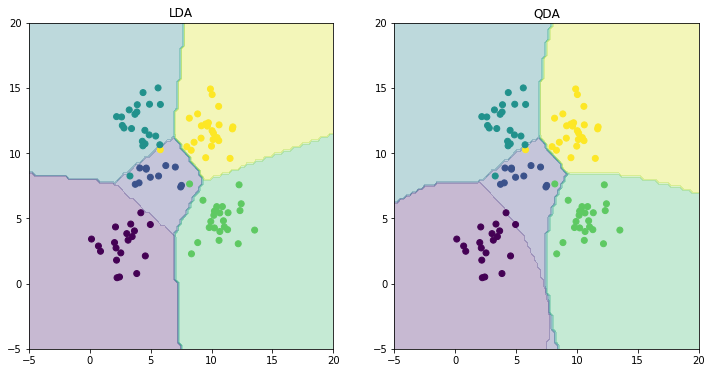

In [91]:
# plotting boundaries
x1 = np.linspace(-5,20,100)
x2 = np.linspace(-5,20,100)
xx1,xx2 = np.meshgrid(x1,x2)
xx = np.zeros((x1.shape[0]*x2.shape[0],2))
xx[:,0] = xx1.ravel()
xx[:,1] = xx2.ravel()

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)

zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('LDA')

plt.subplot(1, 2, 2)

zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest[:,0])
plt.title('QDA')

plt.show()

Problem 2

In [92]:
if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')
    
x1 = np.ones((len(X),1))
x2 = np.ones((len(Xtest),1))

X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE without intercept 106775.361553
MSE with intercept 3707.8401812


Problem 3

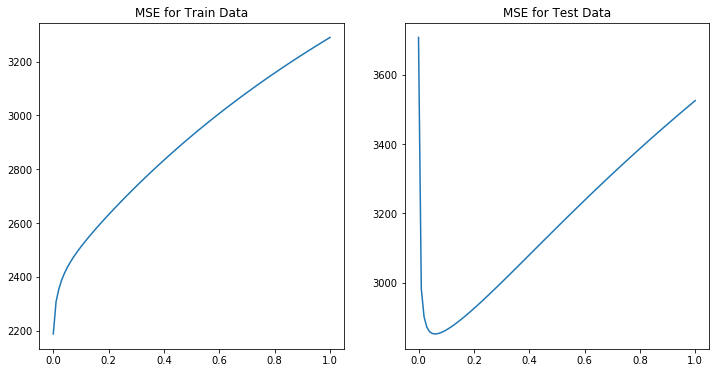

In [93]:
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.show()

Problem 4

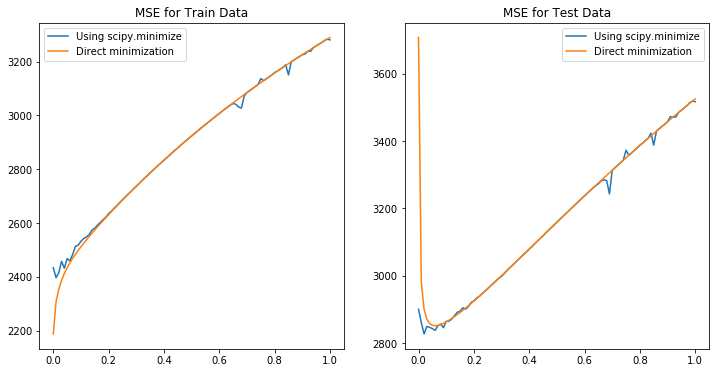

In [94]:
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.show()


Problem 5

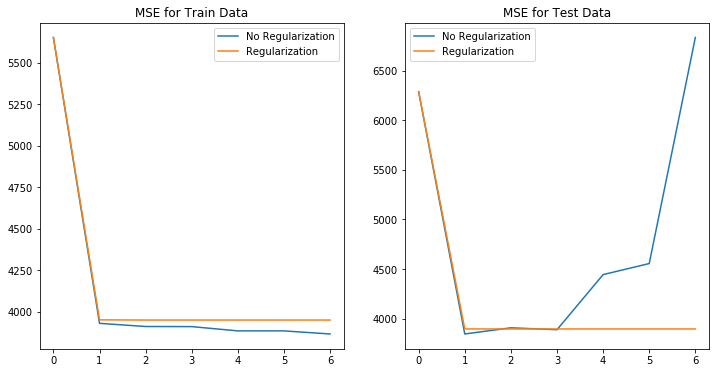

In [95]:
pmax = 7
lambda_opt = lambdas[np.where(mses3==min(mses3))[0][0]]
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()
